In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
# Statistics
from evaluation.classification.statistics import compute_all_size_df,get_precisions
# Visualize
from evaluation.classification.visualize import plot_df_distrib_size
# utils
from evaluation.classification.utils import get_size_list_from_xte
%matplotlib inline
plt.style.use("ggplot")

### --- compare precision with population ---

In [2]:
resnet50 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_concatenate/validation_matrix.csv')
resnet50_resizeFAR = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_resizeFAR_concatenate/validation_matrix.csv')
resnet50_resize = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_resize_concatenate/validation_matrix.csv')

In [3]:
resnet50_precisions = get_precisions(resnet50)
resnet50_resizeFAR_precisions = get_precisions(resnet50_resizeFAR)
resnet50_resize_precisions = get_precisions(resnet50_resize)

In [4]:
exp_name = ["resnet50", "resnet50_resizeFAR", "resnet50_resize"]
exp_ap = [resnet50_precisions.mean(), resnet50_resizeFAR_precisions.mean(), resnet50_resize_precisions.mean()]

In [5]:
df = pd.DataFrame({"exp_name": exp_name, "exp_ap": exp_ap})
df

,exp_name,exp_ap
0,resnet50,0.894719
1,resnet50_resizeFAR,0.894832
2,resnet50_resize,0.882187


In [6]:
df_per_label = pd.DataFrame({"resnet50": resnet50_precisions, "resnet50_resizeFAR": resnet50_resizeFAR_precisions, "resnet50_resize": resnet50_resize_precisions})

In [7]:
new_df_per_label = pd.DataFrame()
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[1], index=df_per_label.columns, name='Ephemeridae'))
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[4], index=df_per_label.columns, name='Plecoptera'))
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[2], index=df_per_label.columns, name='Ephemeroptera'))
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[5], index=df_per_label.columns, name='Trichoptera'))
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[3], index=df_per_label.columns, name='Lepidoptera'))
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[0], index=df_per_label.columns, name='Diptera'))
new_df_per_label

,resnet50,resnet50_resize,resnet50_resizeFAR
Ephemeridae,0.941176,0.941176,0.921569
Plecoptera,0.853846,0.815385,0.869231
Ephemeroptera,0.825843,0.792135,0.786517
Trichoptera,0.907258,0.919355,0.935484
Lepidoptera,0.906367,0.883895,0.910112
Diptera,0.933824,0.941176,0.946078


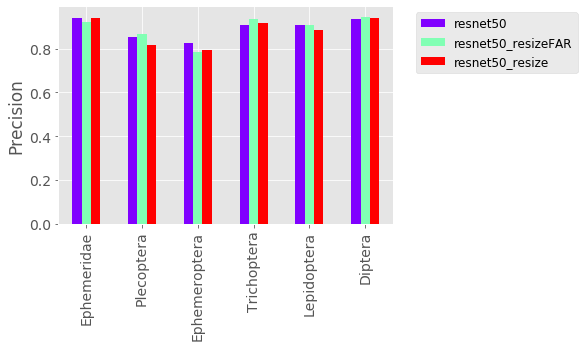

In [8]:
plt.rcParams["font.size"] = 14
new_df_per_label.plot(kind="bar", y=["resnet50", "resnet50_resizeFAR", "resnet50_resize"], cmap="rainbow")
plt.ylabel("Precision")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_concatenate_resize/compare_precision_resnet50.png", bbox_inches="tight")

### --- compare accuracy distribution of size ---

In [10]:
cls_each_size_df = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/each_size_df.csv')
cls_each_size_df["order"] = cls_each_size_df["Insect_size"].apply(lambda x: np.floor(np.log2(x)))
insect_size = np.asarray(cls_each_size_df["order"])
idx, count = np.unique(insect_size, return_counts=True)
insect_size_df = pd.DataFrame({"order": idx, "count": count})

In [11]:
resnet50 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/each_size_df.csv')
resnet50_resizeFAR = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_resizeFAR_concatenate/each_size_df.csv')
resnet50_resize = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_resize_concatenate/each_size_df.csv')
new_resnet50_resizeFAR = pd.DataFrame({"Accuracy": resnet50_resizeFAR["Accuracy"].values, "Insect_size": resnet50["Insect_size"].values})
new_resnet50_resize = pd.DataFrame({"Accuracy": resnet50_resize["Accuracy"].values, "Insect_size": resnet50["Insect_size"].values})
resnet50_resizeFAR = compute_all_size_df(new_resnet50_resizeFAR)
resnet50_resize = compute_all_size_df(new_resnet50_resize)
resnet50 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_concatenate/all_size_df.csv')

In [12]:
resnet50 = resnet50.drop(resnet50.index[[0]])
resnet50_resizeFAR = resnet50_resizeFAR.drop(resnet50_resizeFAR.index[[0]])
resnet50_resize = resnet50_resize.drop(resnet50_resize.index[[0]])

In [13]:
insect_size_df

,order,count
0,1.0,1
1,7.0,10
2,8.0,43
3,9.0,109
4,10.0,229
5,11.0,284
6,12.0,309
7,13.0,209
8,14.0,78
9,15.0,10


In [14]:
all_df = resnet50
all_df = all_df.rename(columns={'Accuracy': 'resnet50'})
all_df = all_df.assign(resnet50_resizeFAR=resnet50_resizeFAR["Accuracy"])
all_df = all_df.assign(resnet50_resize=resnet50_resize["Accuracy"])
all_df = all_df.assign(count=insect_size_df["count"])
all_df

,Unnamed: 0,order,resnet50,Insect_size,resnet50_resizeFAR,resnet50_resize,count
1,1,7.0,1.000000,208.900000,0.900000,0.800000,10
2,2,8.0,0.930233,400.651163,0.837209,0.906977,43
3,3,9.0,0.798165,778.706422,0.834862,0.770642,109
4,4,10.0,0.829694,1510.864629,0.860262,0.838428,229
5,5,11.0,0.887324,2949.616197,0.911972,0.894366,284
6,6,12.0,0.941748,5938.822006,0.938511,0.925566,309
7,7,13.0,0.961722,11264.789474,0.952153,0.956938,209
8,8,14.0,0.961538,22344.653846,0.910256,0.910256,78
9,9,15.0,0.800000,34865.400000,0.900000,0.900000,10


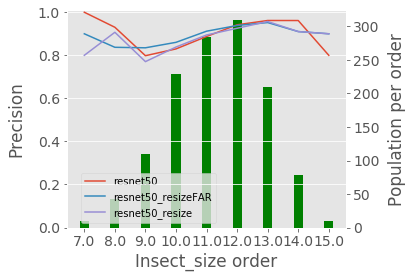

In [17]:
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["7.0", "8.0", "9.0", "10.0", "11.0", "12.0", "13.0", "14.0", "15.0"]

ax1.bar(x_label, all_df["count"], width=0.3, color="g")
ax2.plot(x_label, all_df["resnet50"], label="resnet50")
ax2.plot(x_label, all_df["resnet50_resizeFAR"], label="resnet50_resizeFAR")
ax2.plot(x_label, all_df["resnet50_resize"], label="resnet50_resize")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.55, 0.), loc='lower right', fontsize=10)

ax1.set_xlabel("Insect_size order")
ax1.set_ylabel("Precision")
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per order")
ax2.set_ylim(0., 1.01)
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_concatenate_resize/compare_precision_distrib_of_size.png", bbox_inches="tight")